## Load Data 

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [139]:
data = pd.read_csv("Train-Set.csv")
data

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [140]:
# Shape of data

In [141]:
data.shape

(8523, 12)

## Information of Data

In [142]:
data.describe() # descriptive Statistics

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [143]:
# check null values 
data.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [144]:
# Percentage of null values in our datasets

In [145]:
per = data.isnull().sum() *100 / len(data)
per

ProductID             0.000000
Weight               17.165317
FatContent            0.000000
ProductVisibility     0.000000
ProductType           0.000000
MRP                   0.000000
OutletID              0.000000
EstablishmentYear     0.000000
OutletSize           28.276428
LocationType          0.000000
OutletType            0.000000
OutletSales           0.000000
dtype: float64

In [146]:
# we have to handle the null values becoz the percentage of null values is large

In [148]:
# check duplicated values
data.duplicated().any()

False

## Handling Missing values

In [149]:
data['Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Weight, Length: 8523, dtype: float64

In [150]:
data['OutletSize']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: OutletSize, Length: 8523, dtype: object

In [151]:
# first fill the null values in weight columns

## Univariate Imputation

In [152]:
mean_weight = data['Weight'].mean()
median_weight = data['Weight'].median()
print(mean_weight , median_weight)

12.857645184135976 12.6


In [153]:
data['Item_Weights_Mean'] = data['Weight'].fillna(mean_weight)
data['Item_Weights_Median'] = data['Weight'].fillna(median_weight)

In [154]:
data

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,Item_Weights_Mean,Item_Weights_Median
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,7.210


## KDE Plot

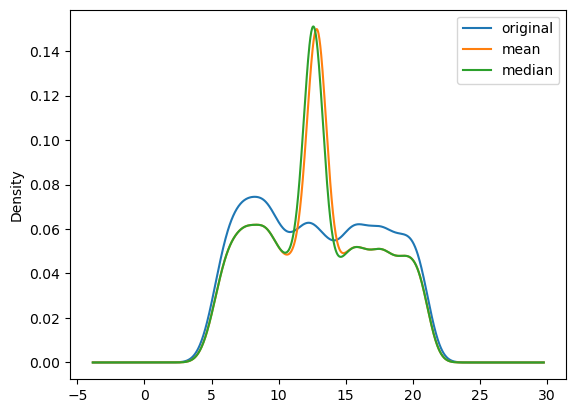

In [155]:
data['Weight'].plot(kind = 'kde' , label = 'original')
data['Item_Weights_Mean'].plot(kind = 'kde' ,label = 'mean')
data['Item_Weights_Median'].plot(kind = 'kde' , label = 'median')
plt.legend()
plt.show()

In [156]:
# Interpolate method

In [157]:
data['Item_Weights_Interpolate'] = data['Weight'].interpolate(method = 'linear')

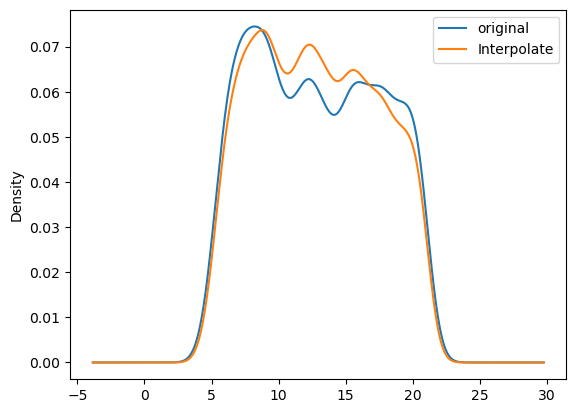

In [158]:
data['Weight'].plot(kind = 'kde' , label = 'original')
data['Item_Weights_Interpolate'].plot(kind = 'kde' ,label = 'Interpolate')
plt.legend()
plt.show()

## Multivariate Imputation

In [159]:
from sklearn.impute import KNNImputer

In [160]:
knn = KNNImputer(n_neighbors = 10 , weights = "distance")

data['KNN_Imputer']  =  knn.fit_transform(data[['Weight']]).ravel()

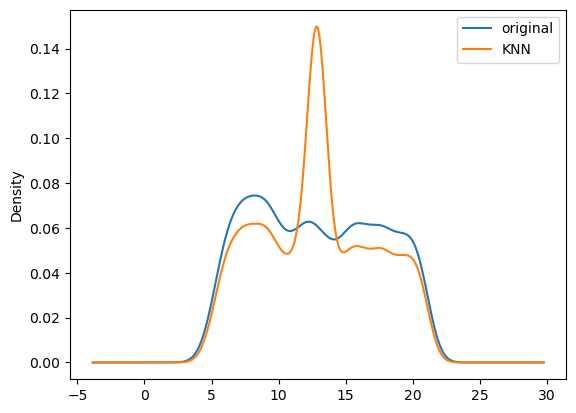

In [161]:
data['Weight'].plot(kind = 'kde' , label = 'original')
data['KNN_Imputer'].plot(kind = 'kde' ,label = 'KNN')
plt.legend()
plt.show()

In [162]:
data

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,Item_Weights_Mean,Item_Weights_Median,Item_Weights_Interpolate,KNN_Imputer
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,9.300,9.300,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,5.920,5.920,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,17.500,17.500,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200,19.200,19.200,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,8.930,8.930,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,6.865,6.865,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380,8.380,8.380,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,10.600,10.600,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,7.210,7.210,7.210


In [163]:
# SO FROM THE KDE PLOT WE CAN CLEARLY SEE THAT THE INTERPOLATE MEHTOD ID BEST FOR FILLING MISSING VALUES

In [164]:
# drop unnecessary columns

In [165]:
data = data.drop(['Weight' , 'Item_Weights_Mean' , 'Item_Weights_Median' , 'KNN_Imputer'] , axis = 1)

In [166]:
data


,ProductID,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,Item_Weights_Interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [167]:
# now check null values

In [168]:
data.isnull().sum()

ProductID                      0
FatContent                     0
ProductVisibility              0
ProductType                    0
MRP                            0
OutletID                       0
EstablishmentYear              0
OutletSize                  2410
LocationType                   0
OutletType                     0
OutletSales                    0
Item_Weights_Interpolate       0
dtype: int64

## Outlet Size

In [169]:
data['OutletSize'].value_counts()

OutletSize
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [170]:
data['OutletType'].value_counts()

OutletType
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [171]:
mode_outlet = data.pivot_table(values = 'OutletSize' , columns = 'OutletType' , aggfunc =(lambda x: x.mode()))

In [172]:
mode_outlet

OutletType,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
OutletSize,Small,Small,Medium,Medium


In [173]:
missing_values = data['OutletSize'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: OutletSize, Length: 8523, dtype: bool

In [174]:
data.loc[missing_values , 'OutletSize'] = data.loc[missing_values, 'OutletType'].apply(lambda x : mode_outlet[x])

In [175]:
data.isnull().sum()

ProductID                   0
FatContent                  0
ProductVisibility           0
ProductType                 0
MRP                         0
OutletID                    0
EstablishmentYear           0
OutletSize                  0
LocationType                0
OutletType                  0
OutletSales                 0
Item_Weights_Interpolate    0
dtype: int64

In [176]:
data

,ProductID,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,Item_Weights_Interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


## FatContent Column

In [177]:
data.columns

Index(['ProductID', 'FatContent', 'ProductVisibility', 'ProductType', 'MRP',
       'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales', 'Item_Weights_Interpolate'],
      dtype='object')

In [178]:
data['FatContent'].value_counts()

FatContent
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [179]:
data['FatContent'] = data['FatContent'].replace({'Low Fat':'LF' , 'low fat':'LF' , 'reg':'Regular'})

In [180]:
data['FatContent'].value_counts()

FatContent
LF         5517
Regular    3006
Name: count, dtype: int64

## ProductVisibility Column

In [181]:
data['ProductVisibility'].value_counts()

ProductVisibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [188]:
data['ProductVisibility_Interpolate'] = data['ProductVisibility'].replace(0, np.nan).interpolate(method = 'linear')


In [190]:
data['ProductVisibility_Interpolate'].value_counts()

ProductVisibility_Interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

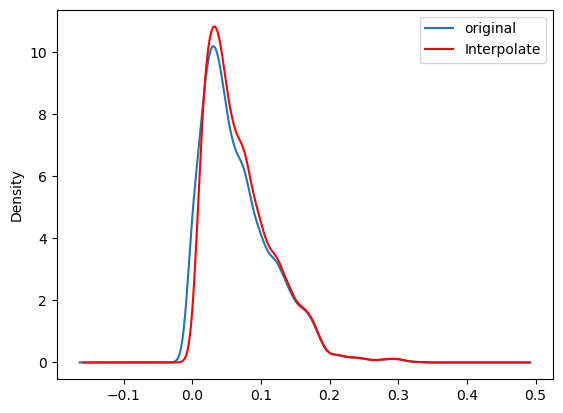

In [192]:
data['ProductVisibility'].plot(kind = 'kde' , label = 'original')
data['ProductVisibility_Interpolate'].plot(kind = 'kde', color = 'red' , label = 'Interpolate')
plt.legend()
plt.show()

In [193]:
# here in kde plot we can clearly see that we clearly handle these values

In [199]:
data

,ProductID,FatContent,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,Item_Weights_Interpolate,ProductVisibility_Interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,0.019278
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200,0.015755
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,0.014751
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,LF,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,0.056783
8519,FDS36,Regular,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,8.380,0.046982
8520,NCJ29,LF,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,0.035186
8521,FDN46,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,0.145221


## Item Column

In [200]:
data.columns

Index(['ProductID', 'FatContent', 'ProductType', 'MRP', 'OutletID',
       'EstablishmentYear', 'OutletSize', 'LocationType', 'OutletType',
       'OutletSales', 'Item_Weights_Interpolate',
       'ProductVisibility_Interpolate'],
      dtype='object')

In [201]:
data['ProductType'].value_counts()

ProductType
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

## ProductID Column

In [203]:
data['Item_Identifer'] = data['ProductID'].apply(lambda x: x[:2])

In [204]:
data['Item_Identifer'].value_counts()

Item_Identifer
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

##

##  EstablishmentYear Column

In [205]:
data['EstablishmentYear'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: EstablishmentYear, Length: 8523, dtype: int64>

In [206]:
import datetime as dt

In [215]:
current_year = dt.datetime.today().year
current_year

2024

In [216]:
data['Outlet_age'] = current_year - data['EstablishmentYear']

In [218]:
data

,ProductID,FatContent,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,Item_Weights_Interpolate,ProductVisibility_Interpolate,Item_Identifer,Outlet_age
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,0.016047,FD,25
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,0.019278,DR,15
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,0.016760,FD,25
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200,0.015755,FD,26
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,0.014751,NC,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,LF,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,0.056783,FD,37
8519,FDS36,Regular,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,8.380,0.046982,FD,22
8520,NCJ29,LF,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,0.035186,NC,20
8521,FDN46,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,0.145221,FD,15


In [221]:
data = data.drop(['ProductID' , 'EstablishmentYear'] , axis = 1)

In [222]:
data

,FatContent,ProductType,MRP,OutletID,OutletSize,LocationType,OutletType,OutletSales,Item_Weights_Interpolate,ProductVisibility_Interpolate,Item_Identifer,Outlet_age
0,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,0.016047,FD,25
1,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.920,0.019278,DR,15
2,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,0.016760,FD,25
3,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.200,0.015755,FD,26
4,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.930,0.014751,NC,37
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,LF,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,6.865,0.056783,FD,37
8519,Regular,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,8.380,0.046982,FD,22
8520,LF,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,10.600,0.035186,NC,20
8521,Regular,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,0.145221,FD,15


## Handling Categorical Column

In [229]:
from sklearn.preprocessing import OrdinalEncoder
data_encoded = data.copy()

cat_cols = data.select_dtypes(include = ['object']).columns

for cols in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[cols] = oe.fit_transform(data_encoded[[cols]])


In [230]:
data_encoded

,FatContent,ProductType,MRP,OutletID,OutletSize,LocationType,OutletType,OutletSales,Item_Weights_Interpolate,ProductVisibility_Interpolate,Item_Identifer,Outlet_age
0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.300,0.016047,1.0,25
1,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.920,0.019278,0.0,15
2,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.500,0.016760,1.0,25
3,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.200,0.015755,1.0,26
4,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.930,0.014751,2.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,2778.3834,6.865,0.056783,1.0,37
8519,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,549.2850,8.380,0.046982,1.0,22
8520,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,1193.1136,10.600,0.035186,2.0,20
8521,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,1845.5976,7.210,0.145221,1.0,15


## Separate Data Into Dependent And Independent Variables 

In [231]:
X = data_encoded.drop('OutletSales' , axis = 1)

In [232]:
y = data_encoded['OutletSales']

## Model Building

## 1 Random Forest Regressor

In [243]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)

from sklearn.model_selection import cross_val_score

score = cross_val_score(rf,X,y ,cv = 5 , scoring ='r2')
print(score.mean())

0.5501340920138283


## 2 XGBRF  Regressor


In [247]:
from xgboost import XGBRFRegressor
xg = XGBRFRegressor(n_estimators =  100  , random_state = 42)
score = cross_val_score(xg, X, y , cv =5 , scoring = 'r2')
print(score.mean())

0.5955225668410347


## XGBRF Regressor Feature Importance

In [250]:
xg = XGBRFRegressor(n_estimators =  100  , random_state = 42)
xg1 = xg.fit(X,y)

pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance': xg1.feature_importances_
}).sort_values(by = 'XGBRF_importance' , ascending = False)

,feature,XGBRF_importance
6,OutletType,0.376154
3,OutletID,0.169257
10,Outlet_age,0.150235
2,MRP,0.147043
4,OutletSize,0.118860
5,LocationType,0.029955
8,ProductVisibility_Interpolate,0.002641
7,Item_Weights_Interpolate,0.002183
1,ProductType,0.001741
9,Item_Identifer,0.001256


In [251]:
# here we select only top 5 columns , becoz the importance of top 5 columns are high

In [252]:
['LocationType' , 'ProductVisibility_Interpolate' , 'Item_Weights_Interpolate' , 'ProductType' ,'Item_Identifer' , 'FatContent']

['LocationType',
 'ProductVisibility_Interpolate',
 'Item_Weights_Interpolate',
 'ProductType',
 'Item_Identifer',
 'FatContent']

In [253]:
from xgboost import XGBRFRegressor
xg = XGBRFRegressor(n_estimators =  100  , random_state = 42)
score = cross_val_score(xg, X.drop(['LocationType' , 'ProductVisibility_Interpolate' , 'Item_Weights_Interpolate' , 'ProductType' ,'Item_Identifer' , 'FatContent'] , axis = 1), y , cv =5 , scoring = 'r2')
print(score.mean())

0.5966037632320667


In [255]:
final_data = X.drop(['LocationType' , 'ProductVisibility_Interpolate' , 'Item_Weights_Interpolate' , 'ProductType' ,'Item_Identifer' , 'FatContent'] ,axis =1)

In [257]:
final_data

,MRP,OutletID,OutletSize,OutletType,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


## Best Model XBGRF REGRESSOR

In [272]:
from xgboost import  XGBRFRegressor
xg_final = XGBRFRegressor()
xg_final.fit(final_data , y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [275]:
X_train , X_test , y_train , y_test = train_test_split(final_data , y, test_size = 0.20, random_state = 42)

In [276]:
xg_final.fit(X_train , y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [277]:
y_pred = xg_final.predict(X_test)

In [279]:
mean_absolute_error(y_pred , y_test)

713.9516489619299

## Save Model

In [280]:
import joblib

In [281]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [282]:
model = joblib.load('bigmart_model')

## GUI


In [283]:
import numpy as np
import datetime as dt
from tkinter import *
import joblib
current_year = dt.datetime.today().year
def show_entry_fields():
    p1=float(e1.get())
    #p4=float(e4.get())
    
    text = clicked.get()
    if text == "OUT010":
        p2=0
        print(p2)
    elif text=="OUT013":
        p2=1
        print(p2)
    elif text=="OUT017":
        p2=2
        print(p2)
    elif text=="OUT018":
        p2=3
        print(p2)
    elif text=="OUT019":
        p2=4
        print(p2)
    elif text=="OUT027":
        p2=5
        print(p2)
    elif text=="OUT035":
        p2=6
        print(p2)
    elif text=="OUT045":
        p2=7
        print(p2)
    elif text=="OUT046":
        p2=8
        print(p2)
    elif text=="OUT049":
        p2=9
        print(p2)
    text0 = clicked0.get()
    if text0 == "High":
        p3=0
        print(p3)
    elif text0=="Medium":
        p3=1
        print(p3)
    elif text0=="Small":
        p3=2
        print(p3)
        
    text1 = clicked1.get()
    if text1 == "Supermarket Type1":
        p4=1
        print(p4)
    elif text1=="Supermarket Type2":
        p4=2
        print(p4)
    elif text1=="Supermarket Type3":
        p4=3
        print(p4)
    elif text1=="Grocery Store":
        p4=0
        print(p4)
    
    p5=current_year - int(e5.get())
    print(p5)
    
    model = joblib.load('bigmart_model')
    result=model.predict(np.array([[p1,p2,p3,p4,p5]]))
    Label(master, text="Sales Amount is in between").grid(row=8)
    Label(master, text=float(result) -714.42 ).grid(row=10)
    Label(master, text="and").grid(row=11)
    Label(master, text=float(result) + 714.42) .grid(row=12)
    print("Sales amount", result)
    
master = Tk()
master.title("Big Mart Sales Prediction using Machine Learning")


label = Label(master, text = " Big Mart Sales Prediction using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

# Item_MRP	Outlet_Identifier	Outlet_Size	Outlet_Type	Outlet_age
Label(master, text="Item_MRP").grid(row=1)
Label(master, text="Outlet_Identifier").grid(row=2)
Label(master, text="Outlet_Size").grid(row=3)
Label(master, text="Outlet_Type").grid(row=4)
Label(master, text="Outlet_Establishment_Year").grid(row=5)


clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049']

clicked0 = StringVar()

options0 = ['High', 'Medium', 'Small']

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']

e1 = Entry(master)

e2 = OptionMenu(master , clicked , *options )
e2.configure(width=15)


e3 = OptionMenu(master , clicked0 , *options0 )
e3.configure(width=15)


e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=15)

e5 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

1
1
0
1999
Sales amount [533.4177]
